# Mini project
_authors_: Giulio Benedetti and Christian

## Data Exploration

In [4]:
import numpy as np
import pandas as pd

df1 = pd.read_csv("2023-11-06_09_24_37_Apple Watch.csv")

df1.head()

,loggingTime(txt),locationTimestamp_since1970(s),locationLatitude(WGS84),locationLongitude(WGS84),locationAltitude(m),locationSpeed(m/s),locationSpeedAccuracy(m/s),locationCourse(°),locationCourseAccuracy(°),locationVerticalAccuracy(m),...,pedometerDistance(m),pedometerFloorAscended(N),pedometerFloorDescended(N),pedometerEndDate(txt),altimeterTimestamp_sinceReboot(s),altimeterReset(bool),altimeterRelativeAltitude(m),altimeterPressure(kPa),batteryState(N),batteryLevel(R)
0,2023-11-06T09:24:37.756+02:00,0,0,0,0,0,-1,0,-1,-1,...,7.403943,0,0,2023-11-06T09:23:25.206+02:00,7.209483e+08,0,-0.98999,101.7212,1,0.7
1,2023-11-06T09:24:37.762+02:00,0,0,0,0,0,-1,0,-1,-1,...,7.403943,0,0,2023-11-06T09:23:25.206+02:00,7.209483e+08,0,-0.98999,101.7212,1,0.7
2,2023-11-06T09:24:37.776+02:00,0,0,0,0,0,-1,0,-1,-1,...,7.403943,0,0,2023-11-06T09:23:25.206+02:00,7.209483e+08,0,-0.98999,101.7212,1,0.7
3,2023-11-06T09:24:37.790+02:00,0,0,0,0,0,-1,0,-1,-1,...,7.403943,0,0,2023-11-06T09:23:25.206+02:00,7.209483e+08,0,-0.98999,101.7212,1,0.7
4,2023-11-06T09:24:37.809+02:00,0,0,0,0,0,-1,0,-1,-1,...,7.403943,0,0,2023-11-06T09:23:25.206+02:00,7.209483e+08,0,-0.98999,101.7212,1,0.7


**Question A**: Remind yourself what sensors are provided, what they record and what they can be informative about.

In [24]:
df1.columns

Index(['loggingTime(txt)', 'locationTimestamp_since1970(s)',
       'locationLatitude(WGS84)', 'locationLongitude(WGS84)',
       'locationAltitude(m)', 'locationSpeed(m/s)',
       'locationSpeedAccuracy(m/s)', 'locationCourse(°)',
       'locationCourseAccuracy(°)', 'locationVerticalAccuracy(m)',
       'locationHorizontalAccuracy(m)', 'locationFloor(Z)',
       'accelerometerTimestamp_sinceReboot(s)',
       'accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)',
       'accelerometerAccelerationZ(G)', 'motionTimestamp_sinceReboot(s)',
       'motionYaw(rad)', 'motionRoll(rad)', 'motionPitch(rad)',
       'motionRotationRateX(rad/s)', 'motionRotationRateY(rad/s)',
       'motionRotationRateZ(rad/s)', 'motionUserAccelerationX(G)',
       'motionUserAccelerationY(G)', 'motionUserAccelerationZ(G)',
       'motionAttitudeReferenceFrame(txt)', 'motionQuaternionX(R)',
       'motionQuaternionY(R)', 'motionQuaternionZ(R)', 'motionQuaternionW(R)',
       'motionGravityX(G)', 'moti

**Question B**: Look into the `accelerometerAcceleration` and `motionUserAcceleration` sensors. What do you think is the relationship between the two? Confirm your suspicion in code.

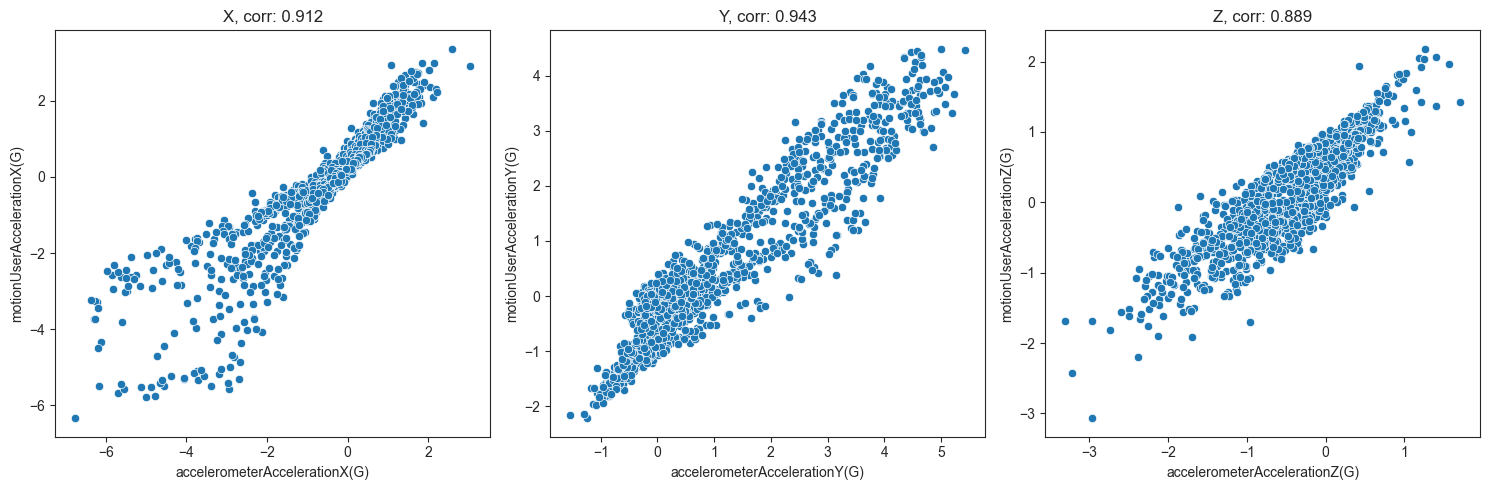

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

corrX = np.corrcoef(df1["accelerometerAccelerationX(G)"], df1["motionUserAccelerationX(G)"])[1, 0]
corrY = np.corrcoef(df1["accelerometerAccelerationY(G)"], df1["motionUserAccelerationY(G)"])[1, 0]
corrZ = np.corrcoef(df1["accelerometerAccelerationZ(G)"], df1["motionUserAccelerationZ(G)"])[1, 0]

fig, axes = plt.subplots(1, 3)

fig.set_figheight(5)
fig.set_figwidth(15)
sns.set_style("ticks")

sns.scatterplot(df1, x="accelerometerAccelerationX(G)", y="motionUserAccelerationX(G)", ax=axes[0])
sns.scatterplot(df1, x="accelerometerAccelerationY(G)", y="motionUserAccelerationY(G)", ax=axes[1])
sns.scatterplot(df1, x="accelerometerAccelerationZ(G)", y="motionUserAccelerationZ(G)", ax=axes[2])

axes[0].set_title(f"X, corr: {corrX:.3f}")
axes[1].set_title(f"Y, corr: {corrY:.3f}")
axes[2].set_title(f"Z, corr: {corrZ:.3f}")

plt.tight_layout()

**Question C**: What useful features could be extracted from the three axes of these recordings?

**Qestion D**: Plot (in any helpful way for you) pieces of data to explore what it looks like and what can be guessed about it based on the visual inspection. What are some of the interesting recorded sensors?

**Question E**: One of the first things, which is important to know is the Frequency sampling (Fs). We are not provided it directly, but how can we approximate it given the data?

In [110]:
import datetime as dt

sample_times = [dt.datetime.strptime(time, "%Y-%m-%dT%H:%M:%S.%f+02:00") for time in df1["loggingTime(txt)"]]
sample_diffs = np.array([time.microseconds for time in np.diff(sample_times)]) / 1e3

print(f"Mean: {np.mean(sample_diffs):.2f} ms")
print(f"Standard deviation: {np.std(sample_diffs):.2f} ms")
print(f"Minimum: {np.min(sample_diffs)} ms, Maximum: {np.max(sample_diffs)} ms")

Mean: 19.90 ms
Standard deviation: 1.38 ms
Minimum: 2.0 ms, Maximum: 46.0 ms


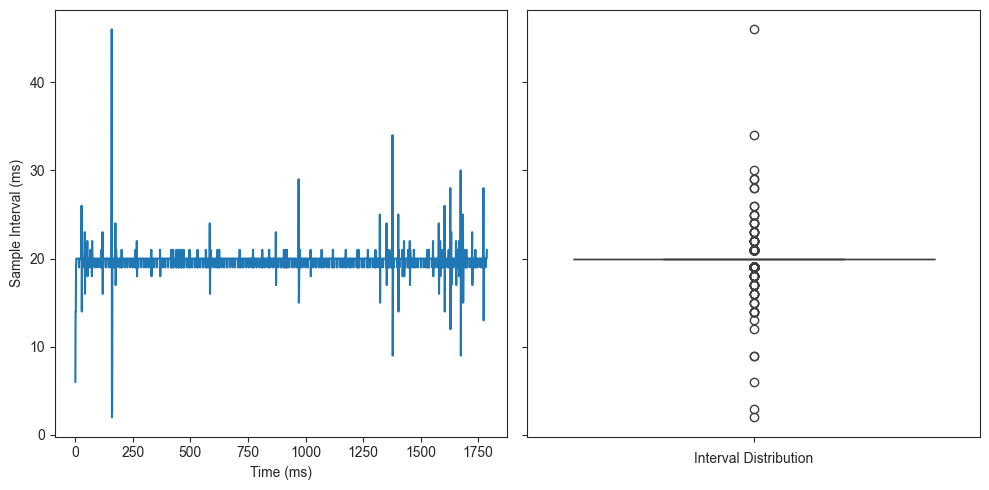

In [111]:
fig, axes = plt.subplots(1, 2, sharey=True)

fig.set_figheight(5)
fig.set_figwidth(10)
sns.set_style("ticks")

sns.lineplot(x=df1.index[:-1], y=sample_diffs, ax=axes[0])
axes[0].set_xlabel("Time (ms)")
axes[0].set_ylabel("Sample Interval (ms)")

sns.boxplot(y=sample_diffs, ax=axes[1])
axes[1].set_xlabel("Interval Distribution")

plt.tight_layout()

**Qestion F**: Given the found Fs, how many seconds are we observing in each session?

## Data Analysis